# Assignment 2

In [61]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To analyze the results, two indexes are going to be considered:
- Speedup: $S(n, t) = \frac{T_{s}(n)}{T_{p}(n)}$
    - The speedup measures how much faster the parallel algorithm is compared to the sequential one.
    - $p$ is the number of used cores.
    - $T_{s}(n)$ is the time taken by the sequential algorithm.
    - $T_{p}(n)$ is the time taken by the parallel algorithm.
- Efficiency: $E(n, t) = \frac{S(n, t)}{p}$
    - The efficiency measures the percentage of time for which a processor is utilized effectively.

The theorical maximum speedup is $p$, while the maximum efficiency is $1$.

In [62]:
# Function to summarize the results and prepare them for plotting
def get_summary(filename):
    path = f"results/{filename}.csv"
    data = pd.read_csv(path)
    data = data.groupby('OMP-threads').mean('time')
    data.reset_index(inplace=True)
    data['size'] = data['size'].astype(int)
    data['speedup'] = data['time'][0] / data['time']
    data['efficiency'] = data['speedup'] / data['OMP-threads']
    data['test'] = 'Size: ' + data['size'].astype(str)
    return data

# OMP Scalability

### Ordered Evolution

In [63]:
# Load data
omp_ordered_10000 = get_summary('omp_ordered_10000')
omp_ordered_5000 = get_summary('omp_ordered_5000')

omp_ordered = pd.concat([omp_ordered_10000, omp_ordered_5000])

omp_ordered

,OMP-threads,size,time,speedup,efficiency,test
0,1,10000,79.070767,1.000000,1.000000,Size: 10000
1,2,10000,40.208491,1.966519,0.983260,Size: 10000
2,3,10000,27.134883,2.913990,0.971330,Size: 10000
3,4,10000,20.629881,3.832827,0.958207,Size: 10000
4,5,10000,16.769590,4.715128,0.943026,Size: 10000
...,...,...,...,...,...,...
59,60,5000,1.418957,14.359342,0.239322,Size: 5000
60,61,5000,1.413675,14.412996,0.236279,Size: 5000
61,62,5000,1.408537,14.465566,0.233316,Size: 5000
62,63,5000,1.404831,14.503728,0.230218,Size: 5000


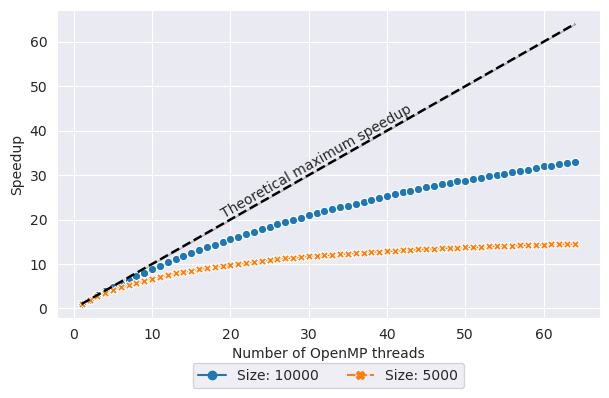

In [64]:
# Speedup plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='speedup', 
    data=omp_ordered, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum speedup:
sns.lineplot(
    x='OMP-threads', 
    y='OMP-threads', 
    data=omp_ordered, 
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=31, y=33, 
         s='Theoretical maximum speedup', 
         va='center', 
         ha='center', 
         rotation=45, 
         rotation_mode='anchor', 
         transform_rotates_text=True)

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')
plt.ylabel('Speedup')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_ordered_speedup.png', dpi=250, bbox_inches='tight')
plt.show()

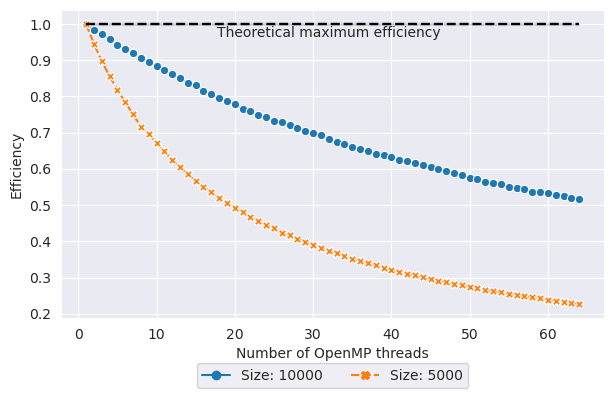

In [65]:
# Efficiency plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='efficiency', 
    data=omp_ordered, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum efficiency
sns.lineplot(
    x='OMP-threads', 
    y=1, 
    data=omp_ordered,
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=32, 
         y=0.975, 
         s='Theoretical maximum efficiency', 
         va='center', 
         ha='center')

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Efficiency')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_ordered_efficiency.png', dpi=250, bbox_inches='tight')
plt.show()

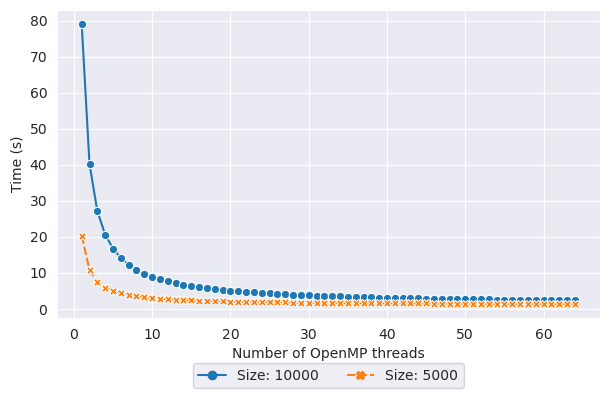

In [66]:
# Time plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='time', 
    data=omp_ordered, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

# Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Time (s)')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_ordered_time.png', dpi=250, bbox_inches='tight')
plt.show()

### Static Evolution

In [67]:
# Load data
omp_static_10000 = get_summary('omp_ordered_10000')
omp_static_5000 = get_summary('omp_ordered_5000')

omp_static = pd.concat([omp_static_10000, omp_static_5000])

omp_static

,OMP-threads,size,time,speedup,efficiency,test
0,1,10000,79.070767,1.000000,1.000000,Size: 10000
1,2,10000,40.208491,1.966519,0.983260,Size: 10000
2,3,10000,27.134883,2.913990,0.971330,Size: 10000
3,4,10000,20.629881,3.832827,0.958207,Size: 10000
4,5,10000,16.769590,4.715128,0.943026,Size: 10000
...,...,...,...,...,...,...
59,60,5000,1.418957,14.359342,0.239322,Size: 5000
60,61,5000,1.413675,14.412996,0.236279,Size: 5000
61,62,5000,1.408537,14.465566,0.233316,Size: 5000
62,63,5000,1.404831,14.503728,0.230218,Size: 5000


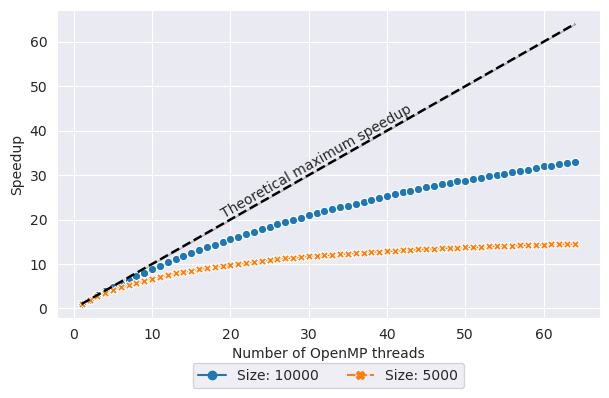

In [72]:
# Speedup plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='speedup', 
    data=omp_static,
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum speedup:
sns.lineplot(
    x='OMP-threads', 
    y='OMP-threads', 
    data=omp_static, 
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=31, y=33, 
         s='Theoretical maximum speedup', 
         va='center', 
         ha='center', 
         rotation=45, 
         rotation_mode='anchor', 
         transform_rotates_text=True)

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')
plt.ylabel('Speedup')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_static_speedup.png', dpi=250, bbox_inches='tight')
plt.show()

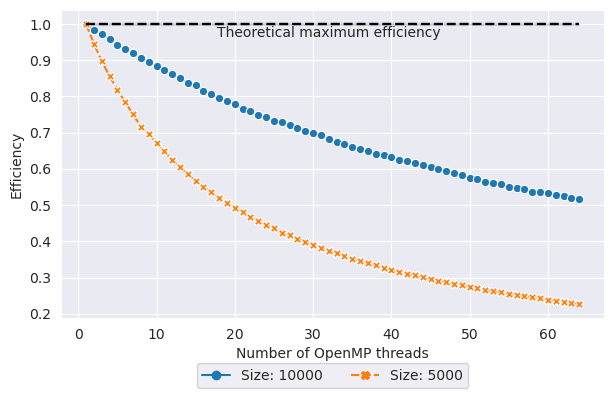

In [69]:
# Efficiency plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='efficiency', 
    data=omp_static, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum efficiency
sns.lineplot(
    x='OMP-threads', 
    y=1, 
    data=omp_static,
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=32, 
         y=0.975, 
         s='Theoretical maximum efficiency', 
         va='center', 
         ha='center')

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Efficiency')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_static_efficiency.png', dpi=250, bbox_inches='tight')
plt.show()

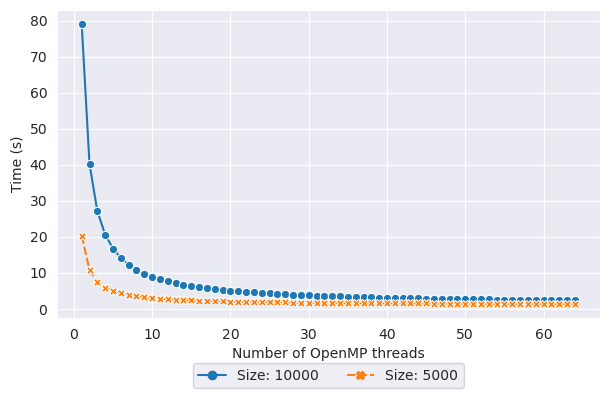

In [70]:
# Time plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='time', 
    data=omp_static, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

# Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Time (s)')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_static_time.png', dpi=250, bbox_inches='tight')
plt.show()